SciPy 패키지는 다음과 같은 다양한 검정 명령을 제공한다.

+ 이항 검정 (Binomial test)
+ 카이제곱 검정 (Chi-square test)
+ 단일 표본 z-검정 (One-sample z-test)
+ 단일 표본 t-검정 (One-sample t-test)
+ 독립 표본 t-검정 (Independent-two-sample t-test)
+ 대응 표본 t-검정 (Paired-two-sample t-test)
+ 등분산 검정 (Equal-variance test)
+ 정규성 검정 (Normality test)

## 이항 검정

이항 검정은 이항 분포를 이용하여 베르누이 확률변수의 모수  𝜇 에 대한 가설을 조사하는 검정 방법이다. SciPy stats 서브패키지의 binom_test 명령은 이항 검정의 유의확률을 계산한다. 디폴트 귀무 가설은  𝜇=0.5 이다.

#### scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')

+ x: 검정통계량. 1이 나온 횟수
+ n: 총 시도 횟수
+ p: 귀무가설의  𝜇  값
+ alternative: 양측검정인 경우에는 'two-sided', 단측검정인 경우에는 'one-sided'


### 예제 1

실제 모수  𝜇0=0.5 인 베르누이 확률 변수의 시뮬레이션을 통해 이항 검정을 실습해 보자. 데이터 갯수  𝑁=10 일 때 1이 나온 횟수가 7이다.

In [2]:
import numpy as np
import scipy as sp
import scipy.stats

N = 10
mu_0 = 0.5

np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

모수가 0.5인 베르누이 분포라면 가장 가능성이 높은 5가 나와야 하는데 여기에는 7이 나왔다. 그렇다면 이 확률변수의 모수는 0.5가 아니라 0.7일까? 이를 확인하기 위해 이항 검정으로 유의확률을 구하면 약 34%이다.

In [3]:
sp.stats.binom_test(n, N)  # 유의확률 구하기 : 34% 귀무가설  mu_0 = 0.5 기각할 수 없다.

0.3437499999999999

유의확률이 높으므로 모수가 0.5라는 귀무 가설을 기각할 수 없다.

### 예제2

동전을 15번 던져 앞면이 12번 나왔다. 이 동전이 공정한지 알아보는 이항 검정을 실시하면 유의확률은 3.5%이다.

In [4]:
N = 15
mu_0 = 0.5
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

10

In [5]:
sp.stats.binom_test(12, N)

0.035156250000000014

### 예제3

이항 검정은 두 가지 값을 가지는 확률변수의 분포를 판단하는데 도움을 준다. 예를 들어 위에서 사용한 데이터가 사실은 어떤 자격시험 합격자 10명 중 7명이 남자라는 것을 뜻하는 데이터였다고 하자. 그렇다면 이 데이터로부터 '남자가 여자보다 실력이 좋다'고 주장할 수 있는가?

합격자의 성별이 베르누이 확률분포로 결정되는 값이라고 가정하자. 만약 베르누이 확률분포으 모수가 0.5이면 남자와 여자의 실력은 같은 것이다. 위의 검정 결과에서 보듯이 원래 남자와 여자가 동등한 실력을 가진 경우에도 7명 혹은 그보다 더 많은 남자가 합격할 확률인 유의확률은 34%나 된다. 따라서 '남자가 여자보다 실력이 좋다'는 주장은 유의하지 않다.

이번에는 같은 확률변수에서 데이터 갯수  𝑁=100 를 시뮬레이션하여 1이 49번 나온 경우 대해 이항 검정을 실시해 보자.

In [9]:
N = 100
mu_0 = 0.5

np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [11]:
sp.stats.binom_test(n, N)  # 귀무가설 기각 못함

0.9204107626128206

유의확률이 92%로 높으므로 귀무 가설을 기각할 수 없다. 따라서  𝜇=0.5 이다.

### 예제4

이번에는 실제 모수  𝜇0=0.35 인 경우에 대해 시뮬레이션을 했더니 1이 100번 중 31번 나왔다.

In [13]:
mu_0 = 0.35

np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [15]:
sp.stats.binom_test(n, N)  # 귀무가설(mu_0=0.5) 기각  

0.00018314322488235352

유의확률이 낮으므로 귀무 가설을 기각할 수 있다. 따라서  𝜇≠0.5 이다. 이는 우리가 시뮬레이션한 진실과 일치한다.

### Practice 1

동전을  𝑁 번 던져 앞면이 나오는 횟수를 측정하였다. 다음 질문에 답하여라.

1. 𝑁=10 이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까?
2. 𝑁=1000 이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까? 이 때  1∼𝑁 의 횟수 범위 중에서 동전이 공정하다고 이야기할 수 있는 횟수의 범위는  𝑁=10 일 때와 비교하여 넓은가 혹은 좁은가?

In [20]:
# 1번문제 : 10번 다 앞면이 나와야 함
N = 10
n = 10
sp.stats.binom_test(n, 10)  

0.001953125

In [21]:
# 2번문제
N = 1000
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

483

In [38]:
sp.stats.binom_test(473, N)  # 473번 이어야 공정하지 않다고 할 수 있음. 횟수범위가 표본값이 클수록 줄어듬

0.09368729147551143

### Practice 3

하나의 레코드(행)이 한 명의 손님을 나타낸다고 가정하자. 열마다 성별(sex), 흡연유무(smoker), 점심/저녁(time) 등을 나타내는 데이터가 있다.

이항 검정을 사용하여 다음 문제를 풀어라.

1. 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?
2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [40]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [54]:
N = tips.sex.value_counts()
N

Male      157
Female     87
Name: sex, dtype: int64

In [63]:
tips[(tips.sex == "Female") & (tips.smoker == "No")].count()

total_bill    54
tip           54
sex           54
smoker        54
day           54
time          54
size          54
dtype: int64

In [65]:
# 1. 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?
# 전체 여자 87명 중 비흡연자는 54명
N = 87
mu_0 = 0.5

np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

43

In [66]:
sp.stats.binom_test(54, N)  # 유의확률은 3.14%로 작기 때문에 귀무가설을 기각할 수 있고, 따라서 비흡연자 수가 많다고 할 수 있음

0.031418110233846136

In [67]:
# 2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

tips[(tips.sex == "Female") & (tips.time == "Dinner")].count()

total_bill    52
tip           52
sex           52
smoker        52
day           52
time          52
size          52
dtype: int64

In [70]:
tips[(tips.sex == "Female") & (tips.time == "Dinner") & (tips.smoker == "No")].count()

total_bill    29
tip           29
sex           29
smoker        29
day           29
time          29
size          29
dtype: int64

In [71]:
N = 52  # 저녁에 오는 여자 손님 전체
n = 29 # 저녁에 오는 여자 손님 중 비흡연자

sp.stats.binom_test(n, N)  # 48.85% 로 높기 때문에 귀무가설 (mu_0 = 0.5) 기각 할 수 없다. 따라서 비흡연자가 더 많다고 할 수 없다.

0.4884556693798922

### Practice 3

어떤 주제에 대해 찬반을 묻는 설문조사를 실시하였고 설문조사 결과 응답자의 70%가 찬성이라는 결과가 나왔다. 전체 국민의 삼분의 이(2/3)가 넘게 찬성한다는 결론을 유의 수준 1%에서 얻기 위해 필요한 응답자의 수는 얼마인가? 단 응답자의 수가 바뀌어도 찬성 70%라는 결과는 바뀌지 않는다고 가정한다.

In [128]:
N = 100
mu_0 = 2/3

np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

71

In [129]:
sp.stats.binom_test(n, N)     

3.2160015295666335e-05

In [134]:
sp.stats.binom_test(69, N)

0.00018314322488235352

## 카이제곱 검정

앞에서 베르누이 분포의 모수에 대해 검정을 하려면 베르누이 분포 표본의 합이라는 통계량이 이항 분포를 따른다는 성질을 이용하면 된다고 배웠다. 그러면 카테고리 분포의 모수에 대해 검정을 하려면 카테고리 분포 표본의 합이라는 통계량이 다항 분포를 따른다는 성질을 이용할 수 있을까?

결론을 말하자면 통계량으로 카테고리 분포 표본의 합은 이용할 수 없다. 왜냐하면 이 통계량은 스칼라가 아닌 벡터값을 가지기 때문이다. 이 때는 카이제곱 검정(Chi-square test)이라는 방법을 사용한다.

카이제곱 검정은 범주형 확률 분포의 모수  𝜇=(𝜇1,…,𝜇𝐾) 에 대한 가설을 조사하는 검정 방법으로 적합도 검정(goodness of fit test)이라고도 부른다. 

##### 원래 범주형 값  𝑘 가 나와야 할 횟수의 기댓값  𝑚𝑘 와 실제 나온 횟수  𝑥𝑘 의 차이를 이용하여 다음과 같이 검정 통계량을 구한다.

$$\sum_{k=1}^K \dfrac{(x_k - m_k)^2}{m_k}$$

SciPy stats 서브패키지의 chisquare 명령은 카이제곱 검정의 검정 통계량과 유의확률을 계산한다. 디폴트 귀무 가설은  𝜇=(1𝐾,…,1𝐾) 이다.

+ scipy.stats.chisquare
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

데이터 갯수  𝑁=10 , 실제 모수  𝜇0=(0.25,0.25,0.25,0.25) 인 경우 대해 카이제곱 검정 명령을 실시해 보자.

In [113]:
N = 10
K = 4
mu_0 = np.ones(K) / K

np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [114]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

유의확률이 15.8%로 높으므로 귀무 가설을 기각할 수 없다. 따라서  𝜇0=(0.25,0.25,0.25,0.25) 이다.

이번에는 데이터 갯수  𝑁=100 , 실제 모수  𝜇0=(0.35,0.30,0.20,0.15) 인 경우 대해 카이제곱 검정 명령을 실시해 보자.

In [116]:
N = 100
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])

np.random.seed(0)
x = np.random.choice(4, N, p=mu_0)
n = np.bincount(x, minlength=4)
n

array([37, 32, 20, 11])

In [117]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

유의확률이 0.087%이므로 귀무가설(0.25, 0.25, 0.25, 0.25)은 기각할 수 있다. 즉, mu_0 = 0.35, 0.30, 0.20, 0.15 채택

### Practice 4

4면체 주사위를 3번 던졌다. 만약 3번 모두 1이 나왔다면 주사위가 공정하다는 귀무 가설의 유의확률은 얼마인가?

In [136]:
N = 3
K = 4
mu_0 = np.array([1.0, 0.0, 0.0, 0.0])

np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([3, 0, 0, 0])

In [137]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=9.0, pvalue=0.02929088653488826)

카이제곱 검정은 어떤 범주형 확률변수  𝑋 가 다른 범주형 확률변수  𝑌 와 독립인지, 즉 상관관계를 가지는가를 검증하는데도 사용할 수 있다.

확률변수  𝑋 와  𝑌 가 독립이라면 결합 확률질량함수  𝑃(𝑥,𝑦) 는 각 확률변수  𝑋 와  𝑌 의 주변 확률밀도함수  𝑃(𝑥) ,  𝑃(𝑦) 의 곱이다. 예를 들어 다음과 같은 확률분포는 가진다면  𝑋 와  𝑌 는 독립이다.

이런 확률변수의 표본을 측정하여 그 횟수를 표로 나타낸 것을 분할표(contingency table)라고 한다. 예를 들어 50개의 표본을 측정한 분할표가 다음과 같다면 확률변수  𝑋 와  𝑌 가 독립이라고 주장할 수 있을 것이다.

그런데 만약 분할표가 다음과 같다면 독립일까 독립이 아닐까? 원래 독립인데 표본오차에 의해 약간의 차이가 생긴 것인지 아니면 원래부터 독립이 아니라서 저런 결과가 나온 것일까?

이 문제는 카이제곱 검정을 사용하여 풀 수 있다. 
##### 만약 두 확률변수가 독립이라면  𝑋=0 일 때의  𝑌  분포와  𝑋=1 일 때의  𝑌  분포가 같아야 한다. 

##### 따라서 두 경우의 표본 집합이 같은 확률 분포에서 나왔다는 것을 귀무 가설로 하는 카이제곱 검정을 하여 채택된다면 두 확률변수는 독립이다. 

 만약 기각된다면 두 확률변수는 상관관계가 있다.

SciPy의 chi2_contingency 명령은 이러한 검정을 수행한다.  𝑋 의 값에 따른 각각의  𝑌 의 분포가 2차원 표(contingency table)의 형태로 주어지면 y 분포의 평균 분포와 실제 y 분포의 차이를 검정 통계량으로 계산한다. 이 값이 충분히 크다면  𝑋 와  𝑌 는 상관관계가 있다. chi2_contingency 명령의 결과는 튜플로 반환되며 첫번째 값이 검정 통계량, 두번째 값이 유의확률이다.

In [138]:
obs = np.array([[5, 15], [10, 20]])
sp.stats.chi2_contingency(obs)

(0.0992063492063492, 0.7527841326498471, 1, array([[ 6., 14.],
        [ 9., 21.]]))

이 때 카이제곱 검정의 유의확률은 75%이다. 즉  𝑋 와  𝑌 는 상관관계가 있다고 말할 수 없다.

### Practice 5

예를 들어 데이터 사이언스 스쿨 수업을 들었는가의 여부가 나중에 대학원에서 머신러닝 수업의 학점과 상관관계가 있는지를 알기 위해 데이터를 구한 결과가 다음과 같다고 하자.

+ 데이터 사이언스 스쿨 수업을 듣지 않은 경우 즉,  𝑋 가 0이면 A, B, C 학점( 𝑌  값)을 받은 학생의 분포가  4,16,20 이다.
+ 데이터 사이언스 스쿨 수업을 들은 사람의 경우 즉,  𝑋 가 1일 때 A, B, C 학점( 𝑌 값)을 받은 학생의 분포가  23,18,19 이다.

이 결과로부터 데이터 사이언스 스쿨 수업을 들었는가의 여부가 머신러닝 수업의 학점과 상관관계가 있다고 말할 수 있는가?

In [139]:
obs = np.array([[4, 16, 20], [23, 18, 19]])
sp.stats.chi2_contingency(obs)

(9.910060890453046, 0.00704786570249751, 2, array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

카이제곱 검정의 유의확률은 0.7%이므로 귀무가설인 독립은 기각되고 상관관계가 있다는 대립가설이 채택된다.

## 단일 표본 z-검정

###### 단일 표본 z-검정(One-sample z-test)은 분산  𝜎2 의 값을 정확히 알고 있는 정규분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 

단일 표본 z-검정의 경우에는 많이 사용되지 않고 SciPy에 별도의 함수가 준비되어 있지 않으므로 norm 명령의 cdf 메서드를 사용하여 직접 구현해야 한다.

+ scipy.stats.norm
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

실제 모수  𝜇0=0 ,  𝜎2=1 인 경우 대해 데이터  𝑁=10 개를 시뮬레이션으로 구하여 단일 표본 z-검정 명령을 실시해 보자.

In [140]:
N = 10
mu_0 = 0

np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

In [141]:
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

단일 표본 z-검정 함수를 다음처럼 구현할 수 있다. 이 함수는 검정 통계량과 유의확률을 반환한다.

In [143]:
def ztest_lsamp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2 / len(x))  # z-검정통계량
    return z, 2 * sp.stats.norm().sf(np.abs(z))  

ztest_lsamp(x)

(2.3338341854824276, 0.019604406021683538)

유의확률이 1.96%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서  𝜇≠0 이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다. 

##### 이러한 오류는 귀무 가설이 진실임에도 불구하고 거짓으로 나온 경우로 유형 1 오류(Type 1 Error)라고 한다. 

유의확률은 유형 1 오류가 나올 확률을 말한다.

데이터 갯수  𝑁=100 , 실제 모수  𝜇0=0 인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [146]:
N = 100
mu_0 = 0

np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

ztest_lsamp(x)

(0.5980801553448499, 0.5497864508624168)

유의확률이 54.98%이므로 귀무 가설을 기각할 수 없다. 따라서  𝜇=0 이다.

## 단일 표본 t-검정

###### 단일 표본 t-검정(One-sample t-test)은 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 

검정 통계량으로 t-통계량을 사용하며 t-통계량의 분포가 스튜던트-t 분포라는 사실로부터 유의확률을 구할 수 있다.

$$\dfrac{\bar{x} - \mu_0}{\dfrac{s}{\sqrt{N}}}$$

이 식에서  𝑥¯ 는 표본평균,  𝑠 는 표본표준편차이다.

SciPy의 stats 서브 패키지의 ttest_1samp 명령을 사용한다. ttest_1samp 명령의 경우에는 디폴트 모수가 없으므로 기댓값을 나타내는 popmean 인수를 직접 지정해야 한다.

+ scipy.stats.ttest_1samp
    + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

데이터 갯수  𝑁=10 , 실제 모수  𝜇0=0 인 경우 대해 단일 표본 t-검정 명령을 실시해 보자.



In [150]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

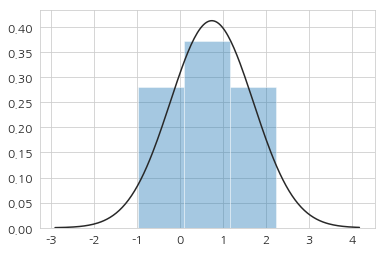

In [151]:
N = 10
mu_0 = 0

np.random.seed(0)

x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [152]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

유의확률이 4.78%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서  𝜇≠0 이다. 이 경우도 유형 1 오류의 예라고 볼 수 있다. 실제 모수  𝜇0 가  0 인데도 시뮬레이션 결과에 대한 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

이번에는 데이터의 갯수  𝑁 이  100 인 경우에 대해 단일 표본 t-검정 명령을 실시해 보자.

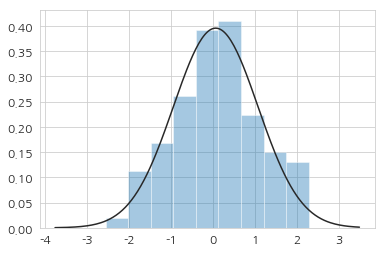

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

In [155]:
N = 100
mu_0 = 0

np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

sp.stats.ttest_1samp(x, popmean=0)

이 때는 유의확률이 55.62%이므로 귀무 가설을 기각할 수 없다. 따라서  𝜇=0 이다.

## 독립 표본 t-검정

독립 표본 t-검정(Independent-two-sample t-test)은 두 개의 독립적인 정규 분포에서 나온  𝑁1 ,  𝑁2 개의 데이터 셋을 사용하여 

###### 두 정규분포의 기댓값이 동일한지를 검사한다.

검정통계량으로는 두 정규 분포의 분산이 같은 경우에는

$$t = \dfrac{\bar{x}_1 - \bar{x}_2}{s \cdot \sqrt{\dfrac{1}{N_1}+\dfrac{1}{N_2}}}$$

을 사용한다. 여기에서  𝑥¯1 ,  𝑥¯2 는 각각의 표본평균이고 표본표준편차  𝑠 는 각각의 표본분산  𝑠21 ,  𝑠22 로부터 다음처럼 구한다.

$$s = \sqrt{\dfrac{\left(N_1-1\right)s_{1}^2+\left(N_2-1\right)s_{2}^2}{N_1+N_2-2}}$$

##### 이 통계량은 자유도가  𝑁1+𝑁2−2 인 스튜던트-t 분포를 따른다.

두 정규 분포의 분산이 다른 경우에는 검정 통계량으로

$$t = \dfrac{\bar{x}_1 - \bar{x}_2}{\sqrt{\dfrac{s_1^2}{N_1} + \dfrac{s_2^2}{N_2}}}$$

를 사용한다. 이 값은 자유도(degree of freedom)가 다음과 같은 스튜던트-t 분포를 따른다.

$$\text{dof} =
\dfrac{\left(\dfrac{s_1^2}{N_1} + \dfrac{s_2^2}{N_2}\right)^2}{\dfrac{\left(s_1^2/N_1\right)^2}{N_1-1} + \dfrac{\left(s_2^2/N_2\right)^2}{N_2-1}}$$

독립 표본 t-검정은 SciPy stats 서브패키지의 ttest_ind 명령을 사용하여 계산한다. 독립 표본 t-검정은 두 정규 분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정 통계량이 다르기 때문에 equal_var 인수를 사용하여 이를 지정해 주어야 한다. 두 분포의 분산이 같은지 다른지는 다음에 나올 등분산 검정(equal-variance test)을 사용하면 된다. 만약 잘 모르겠으면 equal_var=False로 놓으면 된다.

+ scipy.stats.ttest_ind
    + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

두 정규 분포의 기댓값이  𝜇1=0 ,  𝜇2=0.5 로 다르고 분산은  𝜎1=𝜎2=1  으로 같으며 표본의 수가  𝑁1=𝑁2=10 인 경우를 시뮬레이션해 보자. 우리는 분산 값이 정말 같은지 모르므로 일단 equal_var=False로 놓는다.

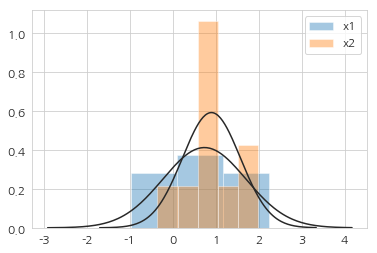

In [159]:
N1 = N2 = 10
mu_1 = 0
mu_2 = 0.5
sigma_1 = sigma_2 = 1

np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N1)
x2 = sp.stats.norm(mu_2, sigma_2). rvs(N2)

sns.distplot(x1, kde=False, fit=sp.stats.norm, label="x1")
sns.distplot(x2, kde=False, fit=sp.stats.norm, label="x2")
plt.legend()
plt.show()

In [160]:
np.mean(x1), np.mean(x2)

(0.7380231707288347, 0.9006460151624349)

이 두 표본집합의 표본평균은 각각 0.74, 0.9로 다르다.

In [161]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

하지만 t-검정의 결과는 유의확률 68.4%이므로 두 기댓값이 같다는 귀무 가설을 기각할 수 없다. 따라서  𝜇1=𝜇2 이다.

이 경우는 검정 결과가 오류인 또 다른 예이다. 이러한 오류는 귀무 가설이 거짓임에도 불구하고 진실로 나온 경우로 유형 2 오류(Type 2 Error)라고 한다. 데이터 수가 증가하면 이러한 오류가 발생할 가능성이 줄어든다.

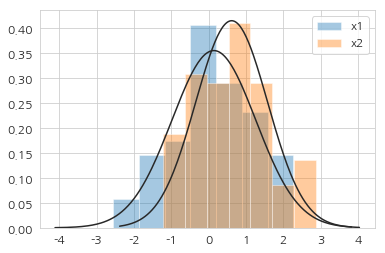

In [164]:
N_1 = 50; N_2 = 100
mu_1 = 0; mu_2 = 0.5
sigma_1 = sigma_2 = 1

np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

sns.distplot(x1, kde=False, fit=sp.stats.norm, label="x1")
sns.distplot(x2, kde=False, fit=sp.stats.norm, label="x2")
plt.legend()
plt.show()

In [165]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-2.5427747064864556, pvalue=0.012800307550312669)

데이터의 갯수를 50개와 100개로 증가시킨 경우에 유의확률은 0.13%로 감소하였다. 따라서 두 확률 분포의 기댓값이 일치한다는 귀무 가설은 기각할 수 있다.

### Practice 6
1반과 2반 학생 들의 성적이 각각 다음과 같다고 가정하자.

+ 1반 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점. 평균 74.1점
+ 2반 : 80점, 85점, 70점, 80점, 35점, 55점, 80점 . 평균 69.2점

1반의 실력이 2반보다 좋다고 이야기 할 수 있는가?

In [166]:
mu_1 = 74.1
mu_2 = 69.2
x1 = np.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
x2 = np.array([80, 85, 70, 80, 35, 55, 80])

In [167]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

유의확률 56%로 두확률의 분포의 기대값이 일치한다는 귀무가설은 기각할 수 없다. 즉, 동일하다고 볼 수 있다. 

## 대응 표본 t-검정

대응 표본 t-검정(Paired-two-sample t-test)은 독립 표본 t-검정을 두 집단의 표본이 1대1 대응하는 경우에 대해 수정한 것이다.

###### 즉, 독립 표본 t-검정과 마찬가지로 두 정규분포의 기댓값이 같은지 확인하기 위한 검정이다. 

통계량은 대응하는 표본 값의 차이  𝑥𝑑=𝑥𝑖,𝑖−𝑥𝑖,2 에서 다음과 같이 계산한다.

$$t = \dfrac{\bar{x}_d - \mu_0}{\dfrac{s_d}{\sqrt{N}}}$$

예를 들어 어떤 반의 학생들이 데이터 사이언스 스쿨을 수강하기 전과 수강한 이후에 본 같은 학생의 두 시험점수는 일대일(pair)로 대응할 수 있다. 이 대응 정보를 알고 있다면 보통의 독립 표본 t-검정에서 발생할 수 있는 표본간의 차이의 영향을 없앨 수 있기 때문에 특강 수강의 영향을 보다 정확하게 추정할 수 있다.

###### 대응 표본 t-검정은 ttest_rel 명령을 사용한다.

 + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

𝜇1=0→0.4 로 평균이 달라진 경우에 대해 대응 표본 t-검정을 실시해 보자. 데이터 갯수 𝑁은 5 이다.

In [176]:
N = 5
mu_1 = 0
mu_2 = 0.4

np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

x1

In [178]:
x2

array([ 1.79419149, -0.03727524, -0.20429244, -0.64106471,  1.24047059])

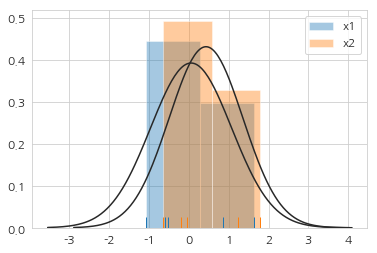

In [179]:
sns.distplot(x1, kde=False, rug=True, fit=sp.stats.norm, label='x1')
sns.distplot(x2, kde=False, rug=True, fit=sp.stats.norm, label='x2')
plt.legend()
plt.show()

5 개의 데이터만으로도 두 평균이 다르다는 것을 유의확률 0.48%로 알아내었음을 확인할 수 있다.

In [181]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

### Practice 7

어느 학급의 9월달 성적과 10월달 성적이 다음과 같다. 점수는 학생 번호 순으로 배열되어 있다.

+ 9월 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점
+ 10월: 90점, 70점, 90점, 65점, 80점, 85점, 65점, 75점, 80점, 90점, 95점, 95점

이 학급의 실력 변화했다고 이야기 할 수 있는가?

In [182]:
x1 = np.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
x2 = np.array([90, 70, 90, 65, 80, 85, 65, 75, 80, 90, 95, 95])

sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-2.6281127723493993, pvalue=0.023486192540203194)

유의확률이 2.3%로 두 데이터의 평균이 값다는 귀무가설은 유의수준이 5%일 경우 기각할 수 있으나, 1% 일 경우는 기각할 수 없다.

## 등분산 검정

등분산 검정(Equal-variance test)은 두 정규 분포로부터 생성된 두 개의 데이터 집합으로부터 

###### 두 정규 분포의 분산 모수가 같은지 확인하기 위한 검정이다.

가장 기본적인 검정통계량은 F분포가 되는 표본분산의 비율을 사용하는 것이다.

$$F=\dfrac{s_1^2}{s_2^2}$$

하지만 실제로는 이보다 더 복잡한 통계량을 이용하는 bartlett, fligner, levene 방법을 주로 사용한다. SciPy의 stats 서브패키지는 이를 위한 bartlett, fligner, levene 명령을 제공한다.

+ scipy.stats.bartlett
    + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
+ scipy.stats.fligner
    + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
+ scipy.stats.levene
    + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

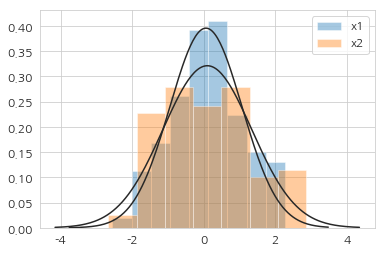

In [183]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2

np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm, label='x1')
sns.distplot(x2, kde=False, fit=sp.stats.norm, label='x2')
plt.legend()
plt.show()

In [184]:
x1.std(), x2.std()

(1.0078822447165796, 1.2416003969261071)

다른 등분산 검정을 적용한 결과는 서로 다를 수 있다. 따라서 검정 결과도 이러한 점을 고려하여 결정한다.

In [185]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [186]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [187]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

## 정규성 검정 (!!)

회귀 분석 등에서는 확률 분포가 가우시안 정규 분포를 따르는지 아닌지를 확인하는 것이 중요하다. 이러한 검정을 정규성 검정(normality test)이라고 한다. 정규성 분포는 중요한만큼 다양한 검정 방법들이 개발되어 있으며 Scipy 패키지 이외에 StatsModels 패키지도 다양한 정규성 검정 명령어를 제공한다.



### SciPy 에서 제공하는 정규성 검정 명령어

+ Kolmogorov-Smirnov test

    + scipy.stats.ks_2samp
        + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

+ Shapiro–Wilk test

    + scipy.stats.shapiro
        + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

+ Anderson–Darling test

    + scipy.stats.anderson
        + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

+ D'Agostino's K-squared test

    + scipy.stats.mstats.normaltest
        + http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.normaltest.html

### StatsModels에서 제공하는 정규성 검정 명령어

+ Omnibus Normality test

    + statsmodels.stats.stattools.omni_normtest
        + http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.omni_normtest.html

+ Jarque–Bera test

    + statsmodels.stats.stattools.jarque_bera
        + http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.jarque_bera.html

+ Kolmogorov-Smirnov test

    + statsmodels.stats.diagnostic.kstest_normal
        + http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.kstest_normal.html

+ Lilliefors test

    + statsmodels.stats.diagnostic.lillifors
        + http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.lillifors.html


이 중에서 Kolmogorov-Smirnov 검정은 사실 정규 분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법이다. 예를 들어 다음처럼 두 개의 다른 정규 분포에서 50개와 100개의 데이터 집합을 각각 생성해서 같은 분포에서 나왔는지 검정해 보자.

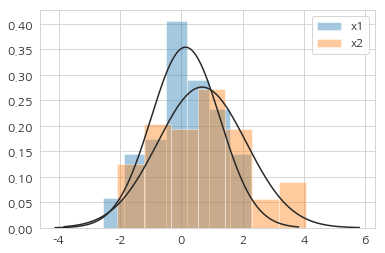

In [188]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm, label='x1')
sns.distplot(x2, kde=False, fit=sp.stats.norm, label='x2')
plt.legend()
plt.show()

예를 들어 ks_2samp 명령은 두 표본 데이터 집합을 인수로 받아서 검정 통계량과 유의확률을 출력한다.

In [189]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)

유의확률이 4.95%로 만약 유의 수준이 5%라면 두 분포는 서로 다른 분포라고 볼 수 있다.